# 1유형 / 데이터 전처리

------

#### Numpy 함수 사용

In [ ]:
import numpy as np

ar1 = np.array([1,2,3])
ar1

array([1, 2, 3])

In [ ]:
ar2 = np.random.randn(2,3) # 2*3 사이즈의 랜덤 배열 생성
ar2

array([[-0.10405733, -0.89966088, -1.77143568],
       [ 0.34545334,  0.89505884,  1.28719705]])

In [ ]:
ar3 = np.zeros(3) # 크기가 3인 1차원배열생성(0으로 초기화 되어있다)
print(ar3)
ar4 = np.ones((2,3), int) # 크기가 2*3 인 2차원 배열 생성(1로 초기화 되어있다)
print(ar4)

[0. 0. 0.]
[[1 1 1]
 [1 1 1]]


In [ ]:
ar5 = np.arange(20, 200, 10)
print(ar5)

ar6 = ar5.reshape(3,6)
print(ar6)

print(ar6.max(axis = 0)) # 열 기준으로 가장 큰 값들을 구하고 반환
print(ar6.max(axis = 1)) # 행 기준

[ 20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170 180 190]
[[ 20  30  40  50  60  70]
 [ 80  90 100 110 120 130]
 [140 150 160 170 180 190]]
[140 150 160 170 180 190]
[ 70 130 190]


In [ ]:
ar7 = np.array([[-5,2,4], [3,-9,6], [7,10,-2]])
print(ar7 > 0)
print((ar7 > 0).sum()) #True 는 1이므로 true개수반환
ar8 = np.where(ar7 < 0 , 0 , ar7) # ar7 이 0보다 작으면 0, 아니면 ar7값 그대로 가져욤
print(ar8)

[[False  True  True]
 [ True False  True]
 [ True  True False]]
6
[[ 0  2  4]
 [ 3  0  6]
 [ 7 10  0]]


In [ ]:
ar7.sort(0) # 열 기준으로 정렬한값  return을 하는게 아닌 값을 직접 수정
print(ar7)

ar7.sort(1) # 행 기준으로 정렬한 값.
print(ar7)

[[-5 -9 -2]
 [ 3  2  4]
 [ 7 10  6]]
[[-9 -5 -2]
 [ 2  3  4]
 [ 6  7 10]]


### Pandas
Series : 1차원 배열 형태의 구조
DataFrame : 2차원 테이블 형태의 구조

In [ ]:
import pandas as pd

sr1 = pd.Series([10,30,20,40,50])
print(sr1.values)
print(sr1.index)
print(sr1[3])

[10 30 20 40 50]
RangeIndex(start=0, stop=5, step=1)
40


In [ ]:
sr2 = pd.Series([10,30,40,20,50], index = ['a','b','c','d','e'])
print(sr2['a'])
print(sr2[0])
print(sr2[['a','c','d']])
print(sr2[[1,3,4]])

10
10
a    10
c    40
d    20
dtype: int64
b    30
d    20
e    50
dtype: int64


In [ ]:
df1 = pd.DataFrame([[1,2,3], [6,4,5]])
print(df1)


   0  1  2
0  1  2  3
1  6  4  5


In [ ]:
dic1 = {
    'fruit' : ['사과', '귤', '배','감'],
    'price' : [1000, 2000, 3000, 4000],
    'qty' : [10,25,43,20]
}
df2 = pd.DataFrame(dic1, index =['a','b','c','d'])

df2.rename(columns = {'fruit' : '과일'},inplace = True)
print(df2)

   과일  price  qty
a  사과   1000   10
b   귤   2000   25
c   배   3000   43
d   감   4000   20


In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BigData분석기사CSV파일/df_sample.csv')
df3.head(5)

,학번,중간,기말,리포트,퀴즈
0,S01,90,95,20,20
1,S02,82,83,18,18
2,S03,80,78,18,18
3,S04,78,75,10,10
4,S05,93,91,12,12


In [ ]:
print(df3.shape)
print(df3.info())
print(df3.count())

(10, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   학번      10 non-null     object
 1   중간      10 non-null     int64 
 2   기말      10 non-null     int64 
 3   리포트     10 non-null     int64 
 4   퀴즈      10 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 528.0+ bytes
None
학번     10
중간     10
기말     10
리포트    10
퀴즈     10
dtype: int64


In [ ]:
print(df3['기말'].mean())
print(df3[['중간','리포트']].mean())
print(df3['학번'].min())
print(df3[['중간','기말']].max())   # 중간, 기말 row의 최대값
print(df3.median())                 # df3 전체의 중간값

78.5
중간     77.6
리포트    15.0
dtype: float64
S01
중간    93
기말    95
dtype: int64
중간     79.0
기말     78.0
리포트    15.0
퀴즈     15.0
dtype: float64


<ipython-input-14-a1a026e2bd10>:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df3.median())                 # df3 전체의 중간값


In [ ]:
print("표준편차")
print(df3[['중간','리포트']].std())

print("분산")
print(df3[['중간','기말']].var())

표준편차
중간     10.616549
리포트     3.559026
dtype: float64
분산
중간    112.711111
기말     93.388889
dtype: float64


In [ ]:
df3.describe()#위 모든정보를 포함한다

,중간,기말,리포트,퀴즈
count,10.000000,10.000000,10.000000,10.000000
mean,77.600000,78.500000,15.000000,15.000000
std,10.616549,9.663793,3.559026,3.559026
min,60.000000,65.000000,10.000000,10.000000
25%,71.250000,75.000000,12.500000,12.500000
50%,79.000000,78.000000,15.000000,15.000000
75%,84.250000,82.250000,18.000000,18.000000
max,93.000000,95.000000,20.000000,20.000000


In [ ]:
df3[['중간', '기말']].corr()

,중간,기말
중간,1.000000,0.707196
기말,0.707196,1.000000


In [ ]:
df3.corr()

<ipython-input-18-cf5c64484bf6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.corr()


,중간,기말,리포트,퀴즈
중간,1.000000,0.707196,-0.129388,-0.129388
기말,0.707196,1.000000,0.339210,0.339210
리포트,-0.129388,0.339210,1.000000,1.000000
퀴즈,-0.129388,0.339210,1.000000,1.000000


In [ ]:
df3

,학번,중간,기말,리포트,퀴즈
0,S01,90,95,20,20
1,S02,82,83,18,18
2,S03,80,78,18,18
3,S04,78,75,10,10
4,S05,93,91,12,12
5,S06,71,75,16,16
6,S07,60,80,18,18
7,S08,72,65,14,14
8,S09,65,65,14,14
9,S10,85,78,10,10


In [ ]:
df3.set_index("학번", inplace=True) # inplace 는 변경사항이 바로 저장된다. 즉 df3 = df3.set_index['학번'] 과 같은결과.

In [ ]:
df3.index = df3['학번']
df3

KeyError: ignored

In [ ]:
print(df3.loc['S01':'S05','중간'])

In [ ]:
print(df3.iloc[0,0])
print(df3.loc['S01':'S04'])

In [ ]:
df4 = df3.drop('퀴즈',axis=1)
df4
df5 = df4.drop('S01') # default = axis = 0
df5

In [ ]:
df5.sort_index(ascending=False)

In [ ]:
df5.sort_values(by='중간',ascending=True)

In [ ]:
df5['합계'] = df5['중간'] + df5['기말']

In [ ]:
df5

### 표준화
표준화는 각 데이터 값들이 평균을 기준으로 얼마나 떨어져 있는지를 표현하는 값으로 변환하는 과정이다.

Z-score 은 각 데이터 값에서 평균을 뺀후, 표준편차로 나누어준 값이다.
파이썬에서는 scipy.stats의 zscore()을 사용하거나,  
sklearn.preprocessing의 StandardScaler(), fit_transform()을 사용하자.  

In [ ]:
df5_mean = np.mean(df5['중간'])
df5_std = np.std(df5['중간'])
df5['중간_Z점수'] = (df5['중간'] - df5_mean) / df5_std
df5

### 정규화
정규화는 데이터를 0과 1사이로 변환하여 데이터의 분포를 조정하는 것이다.  
(x-최소값)/(최대값-최소값) 또는 MinMaxScaler(), minmax_scale()함수를 이용한다.   
MinMaxScaler() 과 minmax_scale()은 sklearn.preprocessing에서 제공하는 패키지 함수이다.

In [ ]:
df5_min = np.min(df5['기말'])
df5_max = np.max(df5['기말'])
df5['기말정규화값'] = (df5['기말'] - df5_min) / (df5_max - df5_min)
df5

In [ ]:
df5.dropna(axis=0) # 결측값 있는 행 제거
df5['퀴즈'].dropna() #퀴즈 열의 결측값 제거.

df['퀴즈'].fillna(df['퀴즈'].mean(), inplace = True) # 퀴즈의 평균값으로 결측값 제거.

In [ ]:
df5.quantile(0.25) # 1사분위수

### 1유형 가이드라인
실기 제 1유형 작업은 수집된 데이터를 대상으로 다양한 명령어를 이용해, 분석에 용이한 형태로 전처리 한다.

제1유형 작업은 데이터 탐색, 데이터 변환, 이상치, 결측치 처리 등 데이터 전처리에 필요한 개념을 이해하고 이를 코드로 구현한다.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.head()

In [ ]:
print(df.describe())
print(df.tail())

In [ ]:
print(df.info())
df["Survival"] = df["Survived"].astype(str)
df["Pclass"] = df["Pclass"].astype(str)
# 위 두 정보는  범주형 변수들이므로 str으로 하자. (굳이 통계낼 필요가 없으므로)

### 데이터 탐색 함수들
**head : 데이터셋의 앞부분의 지정한 수의 레코드를 보여준다**  
**info : 데이터셋 구조와 특징( 각 변수별 타입과 non-null count)등을 보여준다**  
**describe : 파이썬 EDA수행시 가장 많이 사용하는 것으로, 데이터 수치형 변수에 모든 통계와 분석을 보여준다. include="all" 옵션을 넣어주면, 모든 변수에 대해 보여준다**  




In [ ]:
df.describe(include="all")

In [ ]:
# PClass 변수 분석.
grouped = df.groupby("Pclass")
grouped.size()

In [ ]:
data_0 = df[df["Survived"] == 0]["Fare"]
data_1 = df[df["Survived"] == 1]["Fare"]
data_0,data_1

In [ ]:
fig, ax = plt.subplots()
ax.boxplot([data_0, data_1])
plt.show()

In [ ]:
malePercent = df[df["Sex"] == "male"]["Survived"]
df_male = pd.DataFrame(malePercent).groupby("Survived")
df_male.size()

### 사례를 통한 분석  
한국인 1000명의 연간 육류소비량이 53.9kg, 표준편차 5kg의 정규분포를 따르고, 일본인 남성 1000명의 육류소비량이 32.7kg, 표준편차 4kg의 정규분포를 따른다 했을때 두 집단의 육류 소비량을 평균이 0, 표준편차가 1인 표준정규분포로 표준화 해보기.   
> np.random.rand(n) : 0 ~ 1사이의 균일한 분포를 가지는 난수 n개  
> np.random.randint(min,max,size) : min ~ max 사이의 균일한 분포를 가지는 임의의 정수 n개 생성  
> np.random.randn(n) 평균 0, 표준편차 1 인 표준정규분포를 가지는 난수 n개 생성  


In [3]:
import numpy as np
import pandas as pd

meat_consume_Korean = 5 * np.random.randn(1000) + 53.9
meat_consume_Jap = 4 * np.random.randn(1000) + 32.7
df_meatConsume = pd.DataFrame({"한국인" : meat_consume_Korean, "일본인" : meat_consume_Jap})
df_meatConsume

,한국인,일본인
0,44.549128,33.123242
1,57.795821,29.233113
2,55.199528,34.665352
3,50.963472,35.674621
4,51.317134,25.840565
...,...,...
995,42.095006,42.491960
996,49.246955,29.399842
997,56.964059,39.468826
998,49.711275,33.135858


In [ ]:
plt.hist(meat_consume_Korean)
plt.xlabel("Korean")

plt.show()

plt.hist(meat_consume_Jap)
plt.xlabel("Jap")

plt.show()

### 1. Z-표준화   
변수값에서 평균을 뺀후 표준편차로 나누는 값, 변환 후 데이터는 평균0, 표준편차 1 값을 가진다.  
1.  
```python
(x - np.mean(x)) / np.std(x)  
```  
2.  
```python
 import scipy.stats as ss   
ss.zscore(x)  
```  
3.  
```python
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()
scaler.fit_transform(x)  
```

위 함수들로 구할 수 있다.  


In [7]:
import scipy.stats as ss
df_meatConsume["한국인 정규화"] = ss.zscore(df_meatConsume["한국인"])
df_meatConsume["일본인 정규화"] = ss.zscore(df_meatConsume["일본인"])
df_meatConsume

,한국인,일본인,한국인 정규화,일본인 정규화
0,44.549128,33.123242,-1.875829,0.120814
1,57.795821,29.233113,0.752361,-0.819050
2,55.199528,34.665352,0.237247,0.493392
3,50.963472,35.674621,-0.603201,0.737234
4,51.317134,25.840565,-0.533033,-1.638699
...,...,...,...,...
995,42.095006,42.491960,-2.362736,2.384320
996,49.246955,29.399842,-0.943764,-0.778768
997,56.964059,39.468826,0.587336,1.653923
998,49.711275,33.135858,-0.851642,0.123862


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_meatConsume["한국인 정규화"] = scaler.fit_transform(df_meatConsume[["한국인"]])
df_meatConsume

,한국인,일본인,한국인 정규화,일본인 정규화
0,44.549128,33.123242,-1.875829,0.120814
1,57.795821,29.233113,0.752361,-0.819050
2,55.199528,34.665352,0.237247,0.493392
3,50.963472,35.674621,-0.603201,0.737234
4,51.317134,25.840565,-0.533033,-1.638699
...,...,...,...,...
995,42.095006,42.491960,-2.362736,2.384320
996,49.246955,29.399842,-0.943764,-0.778768
997,56.964059,39.468826,0.587336,1.653923
998,49.711275,33.135858,-0.851642,0.123862


### 2. Min-Max 정규화.  
연속형 변수의 값을 0과 1사이의 값으로 변환한다. 스케일이 다른 두 변수를 Min-Max 변환하면 상호간 비교가 가능하다.  
1.  
```python
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(x[[""]])
```
2.  
```python
import numpy as np
(x-np.min(x)) / (np.max(x)-np.min(x))
```  
위 두 코드로 알아낼 수 있다.

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_meatConsume["한국인_MINMAX"] = scaler.fit_transform(df_meatConsume[["한국인"]])
df_meatConsume["일본인_MINMAX"] = scaler.fit_transform(df_meatConsume[["일본인"]])
df_meatConsume

,한국인,일본인,한국인 정규화,일본인 정규화,한국인_MINMAX,일본인_MINMAX
0,44.549128,33.123242,-1.875829,0.120814,0.193206,0.547414
1,57.795821,29.233113,0.752361,-0.819050,0.621968,0.394375
2,55.199528,34.665352,0.237247,0.493392,0.537933,0.608081
3,50.963472,35.674621,-0.603201,0.737234,0.400822,0.647786
4,51.317134,25.840565,-0.533033,-1.638699,0.412269,0.260912
...,...,...,...,...,...,...
995,42.095006,42.491960,-2.362736,2.384320,0.113772,0.915981
996,49.246955,29.399842,-0.943764,-0.778768,0.345263,0.400935
997,56.964059,39.468826,0.587336,1.653923,0.595046,0.797050
998,49.711275,33.135858,-0.851642,0.123862,0.360292,0.547910


In [13]:
import numpy as np
korean = df_meatConsume["한국인"]
df_meatConsume["한국인_MINMAX"] = (korean - np.min(korean)) / (np.max(korean) - np.min(korean))
df_meatConsume

,한국인,일본인,한국인 정규화,일본인 정규화,한국인_MINMAX,일본인_MINMAX
0,44.549128,33.123242,-1.875829,0.120814,0.193206,0.547414
1,57.795821,29.233113,0.752361,-0.819050,0.621968,0.394375
2,55.199528,34.665352,0.237247,0.493392,0.537933,0.608081
3,50.963472,35.674621,-0.603201,0.737234,0.400822,0.647786
4,51.317134,25.840565,-0.533033,-1.638699,0.412269,0.260912
...,...,...,...,...,...,...
995,42.095006,42.491960,-2.362736,2.384320,0.113772,0.915981
996,49.246955,29.399842,-0.943764,-0.778768,0.345263,0.400935
997,56.964059,39.468826,0.587336,1.653923,0.595046,0.797050
998,49.711275,33.135858,-0.851642,0.123862,0.360292,0.547910


### 표준화(StandardScaler, z-score) vs 정규화 (MinMaxScaler)
표준화 : 피처가 정규분포인 경우일때 유옹하고, 출력값이 특정범위로 제한되지 않는다. 주로 평균이 0, 표준편차가 1인것을 확인하고 싶을때, 그렇게 만들고 싶을때 사용한다.  

정규화 : 분포에 대해 모를떄 유용하다. 출력값은 [0,1] 로 스케일링 되고, 피처의 크기가 다를떄 사용한다.  

통상적으로는 표준화를 통해 이상치를 제거하고, 그 다음 데이터를 정규화 해 상대적 크기에 대한 영향력을 줄인 다음 분석을 시작한다.

### 정규분포 변환.  
왜도(skewness)는 분포의 대칭척도이다. 값은 양수, 음수 또는 정의되지 않을 수 있다.  
왜도가 0이 아닌경우에는 한쪽으로 치우쳐 있다.  

|양수   왼쪽으로치우침   평균>중앙값>최빈값|  
|0     좌우대칭       평균=중앙값=최빈값|  
|음수   오른쪽으로치우침  평균<중앙값<최빈값|  


In [17]:
df = pd.read_csv("https://raw.githubusercontent.com/jamovi/r-datasets/master/data/USJudgeRatings.csv")
df.head(1)

,Unnamed: 0,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
0,"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8


In [19]:
import scipy.stats as ss
print(ss.skew(df["CONT"]))  #왜도가 양수이므로, 좌측으로 치우침, 최빈값 < 중앙값 < 평균값
print(ss.skew(df["PHYS"]))  #왜도가 음수이므로, 우측으로 치우침, 최빈값 > 중앙값 > 평균값

1.0859724796276253
-1.5582154642293153


#### 정규화 변환요령  
* 독립변수 값이 증가함에 따라 종속변수가 더 빠르게 증가하기 시작하는 상황에서는 로그변환을 시도한다.
* 데이터가 반대인경우, 독립변수의 값이 증가함에 따라 종속변수 값이 빠르게 감소하는 경우 먼저 제곱변환을 시도한다.  
왜도에 따라 다음과 같이 정규화 변환 식이 달라진다.  

1. 양수  
제곱근 변환 -> sqrt(x)   
로그 변환 -> log(x) or log10(x)  
역수변환 -> 1 / x  

2. 음수  
제곱근 변환 -> sqrt(max(x+1) - x)  
로그 변환 -> log(max(x+1) - x)   
역수변환 -> 1/(max(x+1)-x)  



In [24]:
#로그변환 해보기
df["CONT1"] = np.log(df["CONT"]) #왜도가 양수이므로 로그를 씌워줌
df["PHYS1"] = np.log(np.max(df["PHYS"] + 1) - df["PHYS"])
print(ss.skew(df["CONT1"]))
print(ss.skew(df["PHYS1"]))

0.6555571886692603
0.5824357748750443


### 3. 범주화, 이산형화   
연속형 변수를 범주형 변수로 변환하는 작업이다.  
'몇 개의 범주로 나눌지?' 와 '어떤 기준으로 나눌지?' 를 정하는 것이 중요하다.  
조건문, cut, qcut 을 사용해 범주화한다.

In [34]:
data =[["철수", 52], ["영희", 92], ["미영", 84], ["시완", 71], ["미경", 65], ["영환", 81], ["숙경", 66], ["부영", 77], ["민섭", 73]]
df = pd.DataFrame(data, columns=['이름', '수학점수'])
# 1. 조견 사용해서 구간 지정
df["등급"] = "0"
df.loc[(df["수학점수"] < 60), "등급"] = "F"
df.loc[(df["수학점수"] >= 60) & (df["수학점수"] < 70), "등급"] = "D"
df.loc[(df["수학점수"] >= 70) & (df["수학점수"] < 80), "등급"] = "C"
df.loc[(df["수학점수"] >= 80) & (df["수학점수"] < 90), "등급"] = "B"
df.loc[(df["수학점수"] >= 90), "등급"] = "A"
df

,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D
5,영환,81,B
6,숙경,66,D
7,부영,77,C
8,민섭,73,C


In [41]:
#2. cut 함수 사용
df["등급"] = pd.cut(x = df["수학점수"],
                  bins = [0,60,70,80,90,100],
                  labels = ["F","D","C","B","A"],
                  include_lowest = True
                  )
df

,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D
5,영환,81,B
6,숙경,66,D
7,부영,77,C
8,민섭,73,C


In [43]:
# 3. qcut 함수사용 : 나누고자 하는 범주의 개수를 정해주면 알아서 채워지도록 만든다.
# 구간이 아닌 동일한 개수로 나누어 지도록 구간을 지정할때 qcut을 이용한다.
df["등급 q_cut"] = pd.qcut(x=df["수학점수"],
                         q = 5,
                         labels=["F","D","C","B","A"]
                         )
df

,이름,수학점수,등급,등급 q_cut
0,철수,52,F,F
1,영희,92,A,A
2,미영,84,B,A
3,시완,71,C,D
4,미경,65,D,F
5,영환,81,B,B
6,숙경,66,D,D
7,부영,77,C,B
8,민섭,73,C,C


# 차원축소 : PCA (Principal Component Analysis, 주성분 분석)  
주성분 분석이란 여러 변수들의 변량을 '주성분' 이라고 불리는 서로 상관성이 높은 여러 변수들의 선형조합으로 만든 새로운 변수들로, 요약, 축소하는 것이다.

* 첫번째 주성분으로 전체 변동을 가장 많이 설명할 수 있도록하고, 두번째 주성분으로는 첫번째 주성분과는 상관성이 없어서 첫번째 주성분이 설명하지 못하는 나머지 변동을 정보의 손실없이 가장 많이 설명할 수 있도록 변수들의 선형조합을 만들게 된다.  
* 주성분 분석이나 요잉분석은 다변량통계분석에서 배우게 되는데, 선형대수에 대한 기본적인 이해가 없으면 이론으로 깊이 들어가는것이 매우 어렵다.



In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
iris = pd.read_csv("https://raw.githubusercontent.com/jamovi/r-datasets/master/data/iris.csv")
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [75]:
df = iris.drop(["Species"], axis=1)
df_species = iris["Species"]
df.head()


,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


아래 함수에서 n_components는 변환할 차원의 수를 의미한다.  
pca.explained_variance_ration_ 변수는 변환된 각각의 차원 기여도를 보여준다.  
[9.99076780e-01 4.88088270e-04 3.64475923e-04 5.96331637e-05]이 결과값이므로, 첫번째 차원만으로 전채 변동성의 대부분을 설명가능하다.
2개의 차원만해도 변동성의 99%를 설명가능하므로, 차원을 줄일 수 있다.

In [81]:
# 변수간 스케일차이가 나면, 큰 변수가 주성분에 영향을 많이 주기때문에 주성분 분석전에는 표준화 혹은 정규화를 시켜준다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df["Sepal.Length"] = scaler.fit_transform(df[["Sepal.Length"]]) # [[]] 로하면 dataFrame 리턴, 그냥 []는 Series 리턴.
df["Sepal.Width"] = scaler.fit_transform(df[["Sepal.Width"]])
df["Petal.Length"] = scaler.fit_transform(df[["Petal.Length"]])
df["Petal.Width"] = scaler.fit_transform(df[["Petal.Width"]])

from sklearn.decomposition import PCA
pca = PCA(n_components = 3) # 들어온 변수들을 이용해 새로운 변수를 창조하는 것이므로, 기존값과 다른형태로 나온다. 세부이론은 선형대수학에서...
p_score = pca.fit_transform(df)
print(p_score.shape)
print(pca.explained_variance_ratio_)#[9.99076780e-01 4.88088270e-04 3.64475923e-04 5.96331637e-05]


(150, 3)
[9.99076780e-01 4.88088270e-04 3.64475923e-04]


### 결측치 처리  
분석에서 이루어지는 결측에 대한 처리의 실무적 방법을 알아보자.  
1. 결측치가 포함되어 있는지 확인 : isnull(), sum() 과 결합하여 사용한다.
2. 결측치가 있는 행 전체를 데이터셋에서 제거 : dropna() - axis=0 : 결측치가 있는 모든 행 제거, axis = 1: 결측치가 있는 모든 열 제거
3. 결측치를 특정값으로 대체 : fillna()

In [4]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
#df.info()
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
df_1 = df.dropna(axis = 0) # 891 -> 183
df_2 = df.dropna(subset=["Age"], axis = 0) # 891 -> 714
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


In [9]:
df_3 = df
df_3.fillna(df_3["Age"].mean(), inplace=True)
df_3.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,29.699118,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,29.699118,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,29.699118,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,29.699118,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,29.699118,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,29.699118,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,29.699118,C


In [14]:
from scipy.stats import mode

df_3.fillna(df_3["Embarked"].mode(), inplace = True) # 최빈값인 S를 가져옴.
print(df_3["Embarked"].isnull().sum()) # 결측값 S로 대체됨.

#df_3.finllna(method="ffill", inplace = True) 결측값을 이전값으로 대체.



0


In [16]:
df_4 = df
df_4["Age"].fillna(df_4.groupby("Sex")["Age"].transform('mean'),inplace=True) # 그냥 mean() 써도 되긴하다.
df_4.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,29.699118,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,29.699118,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,29.699118,Q


### 이상치 처리
이상치는 측정과정에서 데이터들의 가변성, 변동성 때문에 나타날 수도 있고, 실제로 잘못된 실험에 의한 에러일 수도 있다.

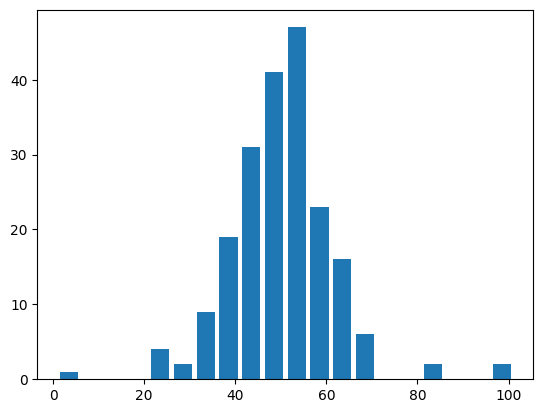

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = 10 * np.random.randn(200) + 50
df = pd.DataFrame(data, columns = ["값"])
df.loc[201] = 100
df.loc[203] = 101
df.loc[202] = 1

plt.hist(df["값"], bins=20, rwidth = 0.8)
plt.show()

In [24]:
Q1 = df["값"].quantile(.25)
Q2 = df["값"].quantile(.5)
Q3 = df["값"].quantile(.75)
IQR = Q3-Q1
IQR

12.078567182921226

In [25]:
#이상치는  1사분위수 - IQR * 1.5 < Outlier < 3사분위수 + IQR * 1.5
condition = (df["값"] < Q1-(IQR*1.5))
lower_df = df[condition]
condition = df["값"] > Q3 + (IQR * 1.5)
upper_df = df[condition]
lower_df, upper_df

(             값
 66   22.682462
 100  22.196729
 116  21.802556
 202   1.000000,
               값
 22    81.199008
 69    84.517775
 201  100.000000
 203  101.000000)